# Spam detection with the Logistic Regression

In [22]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [23]:
# get the data directly from github
url = 'https://raw.githubusercontent.com/BI-DS/EBA-3530/main/Lecture_2/spam.csv'
df = pd.read_csv(url, delimiter=',')

# print no. of rows and columns
print(df.shape)

# print a summary of the data
print(df.head(5))

# print variable names 
print(list(df))

(4601, 58)
   word_make  word_address  ...  capital_run_length_total  spam
0          0             1  ...                       278     1
1          1             1  ...                      1028     1
2          1             0  ...                      2259     1
3          0             0  ...                       191     1
4          0             0  ...                       191     1

[5 rows x 58 columns]
['word_make', 'word_address', 'word_all', 'word_3d', 'word_our', 'word_over', 'word_remove', 'word_internet', 'word_order', 'word_mail', 'word_receive', 'word_will', 'word_people', 'word_report', 'word_addresses', 'word_free', 'word_business', 'word_email', 'word_you', 'word_credit', 'word_your', 'word_font', 'word_000', 'word_money', 'word_hp', 'word_hpl', 'word_george', 'word_650', 'word_lab', 'word_labs', 'word_telnet', 'word_857', 'word_data', 'word_415', 'word_85', 'word_technology', 'word_1999', 'word_parts', 'word_pm', 'word_direct', 'word_cs', 'word_meeting', 'word_or

## Data visualization

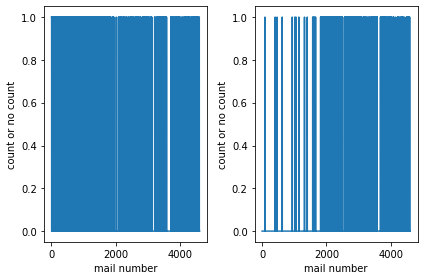

In [ ]:
fig, ax = plt.subplots(1,2)
num_mails = np.linspace(0,df.shape[0], num=df.shape[0])

ax[0].step(num_mails, df.word_free)
ax[0].set(xlabel='mail number')
ax[0].set(ylabel='count or no count')

ax[1].step(num_mails, df.word_meeting)
ax[1].set(xlabel='mail number')
ax[1].set(ylabel='count or no count')
fig.tight_layout()
plt.show()

## Simple Logistic regression

In [25]:
# Use statsmodels in python

# get y variable an x variables
y = df.spam
# get all variables, but y, to fit a logistic regression
x = df.drop(columns=['spam']).copy()

# add an intercept term beta_0
x = sm.add_constant(x)
logistic_regression = sm.Logit(y, x).fit()
print(logistic_regression.summary())

Optimization terminated successfully.
         Current function value: 0.168296
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4543
Method:                           MLE   Df Model:                           57
Date:                Thu, 13 Jan 2022   Pseudo R-squ.:                  0.7490
Time:                        15:00:28   Log-Likelihood:                -774.33
converged:                       True   LL-Null:                       -3085.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.9682      0.147    -13.429      0.000     

In [21]:
results = pd.read_html(logistic_regression.summary().tables[1].as_html(),header=0,index_col=0)[0]
word_free_coeff = results['coef'][results['coef'].index=='word_free'].values[0]
CI_LB = results['[0.025'][results['coef'].index=='word_free'].values[0]
CI_UB = results['0.975]'][results['coef'].index=='word_free'].values[0]
# Remember the log odds: log(p/(1-p)), meaning that the odds of an event
# are the probabilities that it happend over the probability that it does
# not. 

# The coefficients here are related to the log odds:
# log(p/(1-p)) = x'B where B are the coefficients and p the probablity for
# spam and 1-p the probability for not spam
# The odds of spam when the word_free occurs
print('The odds for spam increases {0:.1f} times that its coefficient '\
      'is {1:.4f} with confidence interval between {2:.4f} and {3:.4f}'\
      .format(np.exp(word_free_coeff), word_free_coeff, CI_LB, CI_UB))
# I.e., the odds of spam increases almost 5 times if the mail contains the
# word spam!

The odds for spam increases 4.7 times that its coefficient is 1.5427 with confidence interval between 1.1920 and 1.8930


In [ ]:
# prediction for mail number 1 and 4000
# i.e. p(y|x)=exp(x'B)/(1+exp(x'B))
logistic_regression.predict(x)[[0,3999]]

0       0.883907
3999    0.150999
dtype: float64

In [ ]:
# one parameter logistic regression
x = df.word_free
logistic_regression = sm.Logit(y, x).fit()
print(logistic_regression.summary())

Optimization terminated successfully.
         Current function value: 0.642296
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4600
Method:                           MLE   Df Model:                            0
Date:                Wed, 12 Jan 2022   Pseudo R-squ.:                 0.04210
Time:                        11:19:28   Log-Likelihood:                -2955.2
converged:                       True   LL-Null:                       -3085.1
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
word_free      1.3673      0.071     19.376      0.000       1.229       1.506
